## Week 4. Linear Regression - Case Study 

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<div style = "font-size:25px; font-weight:bold">

1. Check the names of the columns. Change if necessary. 
</div>

In [95]:
corona_data = pd.read_csv("covid_19_data.csv")
df = corona_data.copy()
df.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [96]:
df.columns = ["sno", "observation_date", "province_state", "country_region","last_update","confirmed",
              "deaths", "recovered"]
df.head(2)

,sno,observation_date,province_state,country_region,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [97]:
df.columns

Index(['sno', 'observation_date', 'province_state', 'country_region',
       'last_update', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

<div style = "font-size:25px; font-weight:bold">

2. Check the data types of columns. 
</div>

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               6722 non-null   int64  
 1   observation_date  6722 non-null   object 
 2   province_state    3953 non-null   object 
 3   country_region    6722 non-null   object 
 4   last_update       6722 non-null   object 
 5   confirmed         6722 non-null   float64
 6   deaths            6722 non-null   float64
 7   recovered         6722 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.2+ KB


In [99]:
# Convert observation_date to datetime 
print("Dtype before conversion: ", df["observation_date"].dtype)
df["observation_date"] = pd.to_datetime(df["observation_date"], errors="coerce", format = "%m/%d/%Y")
print("Dtype before conversion: ", df["observation_date"].dtype)

Dtype before conversion:  object
Dtype before conversion:  datetime64[ns]


<div style = "font-size:25px; font-weight:bold">

3. Drop the unnecessary columns
</div>

In [100]:
# Check the unique values of province_state, country_region columns to see 
# whether they can be encoded by onehotencoder, or dummy variables 

In [101]:
df["province_state"].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'British Columbia', 'Bavaria',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'San Benito, CA', 'Toronto, ON', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX',
       'Humboldt County,

In [102]:
df["country_region"].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [103]:
# Drop these columns
df.drop(["province_state","country_region"], axis=1, inplace = True)

In [104]:
# we will not use last_update feature. Therefore, we can drop it
df.drop("last_update", axis = 1, inplace = True)

In [105]:
df

,sno,observation_date,confirmed,deaths,recovered
0,1,2020-01-22,1.0,0.0,0.0
1,2,2020-01-22,14.0,0.0,0.0
2,3,2020-01-22,6.0,0.0,0.0
3,4,2020-01-22,1.0,0.0,0.0
4,5,2020-01-22,0.0,0.0,0.0
...,...,...,...,...,...
6717,6718,2020-03-18,0.0,0.0,0.0
6718,6719,2020-03-18,0.0,0.0,0.0
6719,6720,2020-03-18,0.0,0.0,0.0
6720,6721,2020-03-18,0.0,0.0,0.0


<div style = "font-size:25px; font-weight:bold">

4. Group by the data based on observation_date
</div>

In [106]:
data = df.groupby(by="observation_date")[["confirmed", "deaths", "recovered"]].sum().reset_index()
data

,observation_date,confirmed,deaths,recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
5,2020-01-27,2927.0,82.0,61.0
6,2020-01-28,5578.0,131.0,107.0
7,2020-01-29,6165.0,133.0,126.0
8,2020-01-30,8235.0,171.0,143.0
9,2020-01-31,9925.0,213.0,222.0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  57 non-null     datetime64[ns]
 1   confirmed         57 non-null     float64       
 2   deaths            57 non-null     float64       
 3   recovered         57 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 KB


In [108]:
data['days'] = (data['observation_date'] - data['observation_date'].min()).dt.days + 1

In [109]:
data.head(3)

,observation_date,confirmed,deaths,recovered,days
0,2020-01-22,555.0,17.0,28.0,1
1,2020-01-23,653.0,18.0,30.0,2
2,2020-01-24,941.0,26.0,36.0,3


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  57 non-null     datetime64[ns]
 1   confirmed         57 non-null     float64       
 2   deaths            57 non-null     float64       
 3   recovered         57 non-null     float64       
 4   days              57 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.4 KB


In [111]:
data['infected'] = data['confirmed'] - data['recovered'] - data['deaths']

In [112]:
data.head()

,observation_date,confirmed,deaths,recovered,days,infected
0,2020-01-22,555.0,17.0,28.0,1,510.0
1,2020-01-23,653.0,18.0,30.0,2,605.0
2,2020-01-24,941.0,26.0,36.0,3,879.0
3,2020-01-25,1438.0,42.0,39.0,4,1357.0
4,2020-01-26,2118.0,56.0,52.0,5,2010.0


In [113]:
# we don't need observation_date anymore, therefore we can drop it 
data.drop("observation_date", axis = 1, inplace = True)
data.head()

,confirmed,deaths,recovered,days,infected
0,555.0,17.0,28.0,1,510.0
1,653.0,18.0,30.0,2,605.0
2,941.0,26.0,36.0,3,879.0
3,1438.0,42.0,39.0,4,1357.0
4,2118.0,56.0,52.0,5,2010.0


<div style = "font-size:25px; font-weight:bold">

5. Visualize the relationship between **days since first observation*  and confirmed/deaths/recovered/infected
</div>

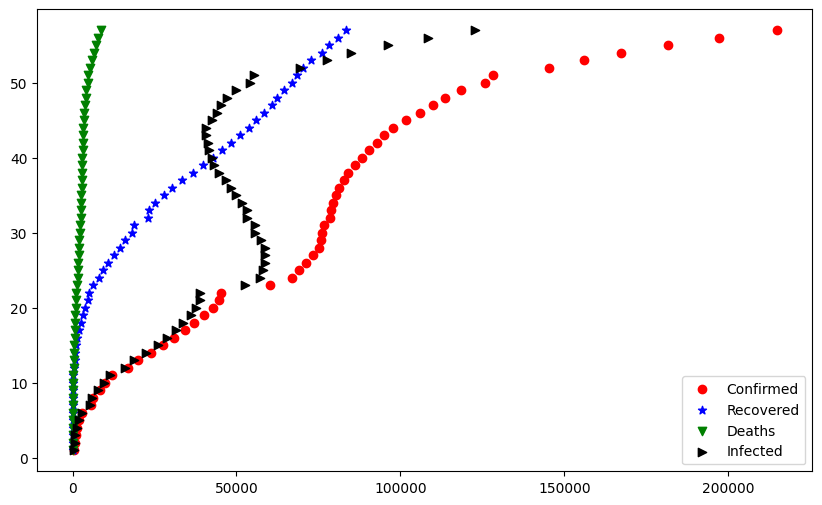

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(data["confirmed"], data["days"], color="red", label="Confirmed")
plt.scatter(data["recovered"], data["days"], color="blue",marker="*", label="Recovered")
plt.scatter(data["deaths"], data["days"], color="green", marker="v",label="Deaths")
plt.scatter(data["infected"], data["days"], color="black", marker=">", label="Infected")
plt.legend()
plt.show()

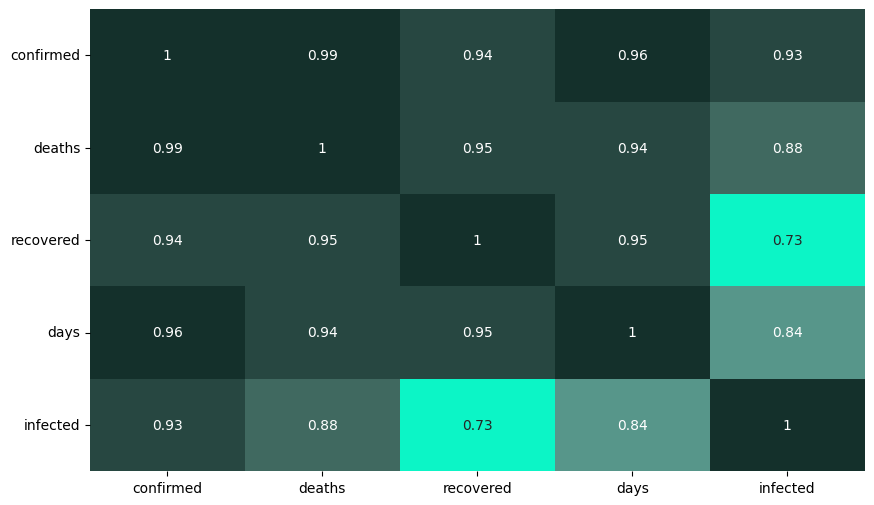

In [115]:
# Find correlations between variables
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap=["#0cf5c6", "#6fd6c2", "#57968a", "#406960", "#274741", "#14302b"],
            cbar=False)
plt.yticks(rotation=0)
plt.show()

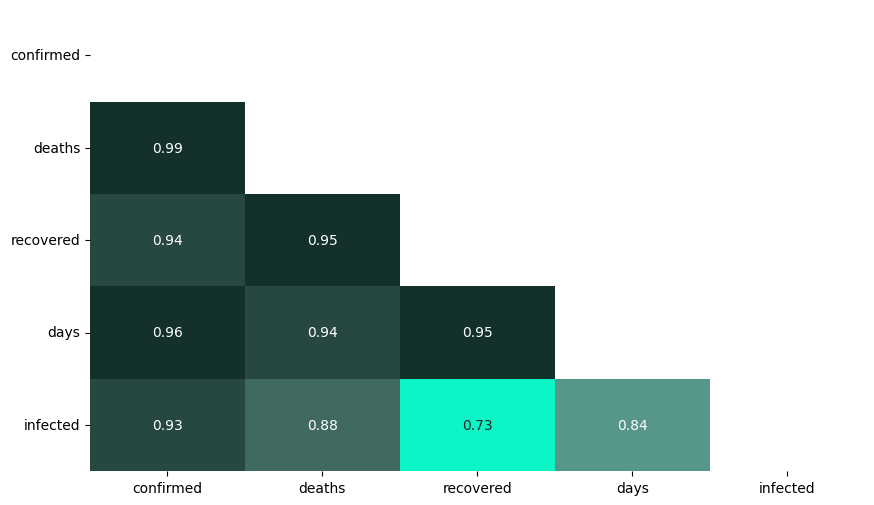

In [116]:
# Find correlations between variables
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap=["#0cf5c6", "#6fd6c2", "#57968a", "#406960", "#274741", "#14302b"],
            cbar=False, mask = mask)
plt.yticks(rotation=0)
plt.show()

<div style = "font-size:25px; font-weight:bold">

6. Linear Regression Model between Days and Confirmed
</div>

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [172]:
y = data[["confirmed"]] # target
X = data[["days"]] # feature

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=111,
                                                   shuffle=True)

In [174]:
model = LinearRegression()

In [175]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [176]:
y_pred = model.predict(X_test)

In [177]:
# Performance Metrics

In [178]:
print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

R2 score:  0.8819919284455191
MAE:  9888.87396780231
MAPE:  2.6117117891902724


In [179]:
indexes = ["R2 score", "Mean Abs. Err.", "Mean Abs.Perc.Err"]
values = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred),mean_absolute_percentage_error(y_test, y_pred) ]
results = pd.DataFrame(data=values, index = indexes, columns = ["Confirmed"])

In [180]:
results

,Confirmed
R2 score,0.881992
Mean Abs. Err.,9888.873968
Mean Abs.Perc.Err,2.611712


In [181]:
# Visualize the model results

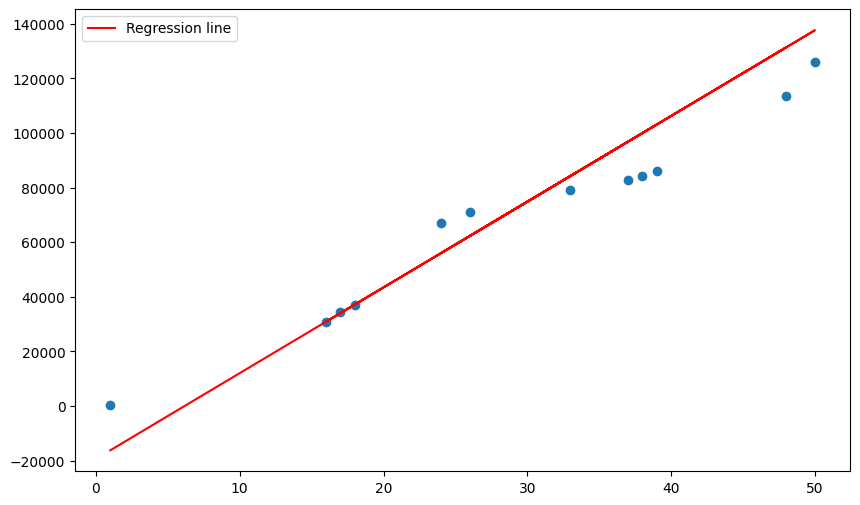

In [182]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = "red", label = "Regression line")
plt.legend()
plt.show()

<div style = "font-size:25px; font-weight:bold">

7. Linear Regression Model between Days and Deaths
</div>

In [183]:
X = data[["days"]]
y = data[["deaths"]]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   shuffle=True,
                                                   random_state=111)

In [185]:
model = LinearRegression()

In [186]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [187]:
y_pred = model.predict(X_test)

In [188]:
print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

R2 score:  0.8488506242267351
MAE:  467.92748744246563
MAPE:  5.259956300553642


In [190]:
results["Deaths"] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_absolute_percentage_error(y_test, y_pred)]
results

,Confirmed,Deaths
R2 score,0.881992,0.848851
Mean Abs. Err.,9888.873968,467.927487
Mean Abs.Perc.Err,2.611712,5.259956


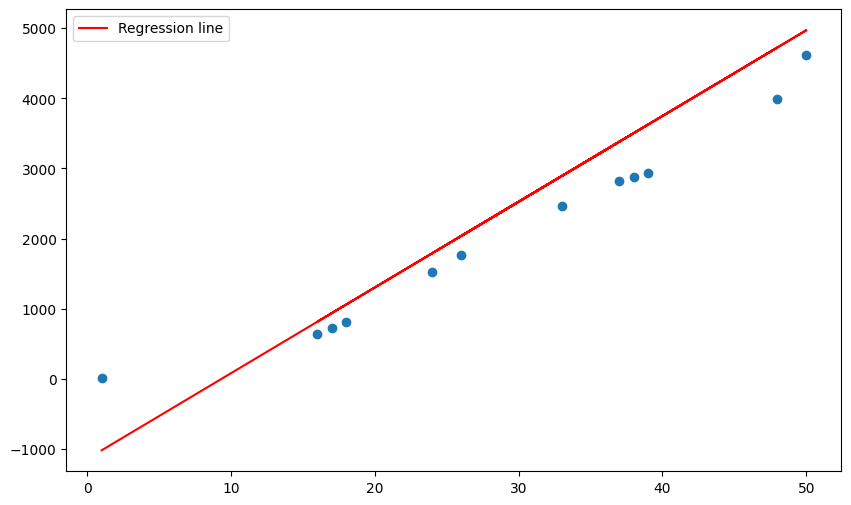

In [191]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = "red", label = "Regression line")
plt.legend()
plt.show()

<div style = "font-size:25px; font-weight:bold">

8. Linear Regression Model between Days and Infected
</div>

In [192]:
X = data[["days"]]
y = data[["infected"]]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   shuffle=True,
                                                   random_state=111)

In [194]:
model = LinearRegression()

In [195]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [196]:
y_pred = model.predict(X_test)

In [197]:
print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

R2 score:  0.25125380601516534
MAE:  11531.900807483902
MAPE:  0.5400502568257483


In [198]:
results["Infected"] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_absolute_percentage_error(y_test, y_pred)]
results

,Confirmed,Deaths,Infected
R2 score,0.881992,0.848851,0.251254
Mean Abs. Err.,9888.873968,467.927487,11531.900807
Mean Abs.Perc.Err,2.611712,5.259956,0.540050


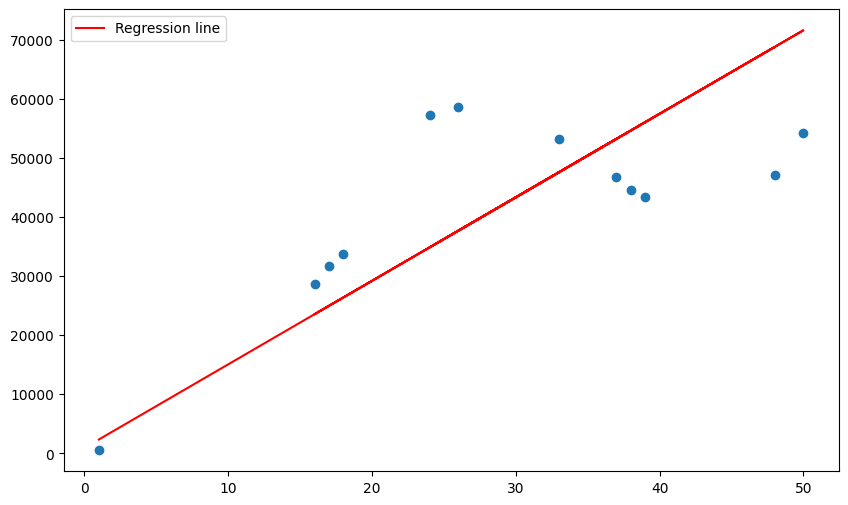

In [157]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = "red", label = "Regression line")
plt.legend()
plt.show()

<div style = "font-size:25px; font-weight:bold">

9. Linear Regression Model between Days and Recovered
</div>

In [199]:
X = data[["days"]]
y = data[["recovered"]]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   shuffle=True,
                                                   random_state=111)

In [201]:
model = LinearRegression()

In [202]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [203]:
y_pred = model.predict(X_test)

In [204]:
print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

R2 score:  0.8504553664752333
MAE:  7962.400962970241
MAPE:  53.23818045420532


In [206]:
results["Recovered"] = [r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_absolute_percentage_error(y_test, y_pred)]
results

,Confirmed,Deaths,Infected,Recovered
R2 score,0.881992,0.848851,0.251254,0.850455
Mean Abs. Err.,9888.873968,467.927487,11531.900807,7962.400963
Mean Abs.Perc.Err,2.611712,5.259956,0.540050,53.238180


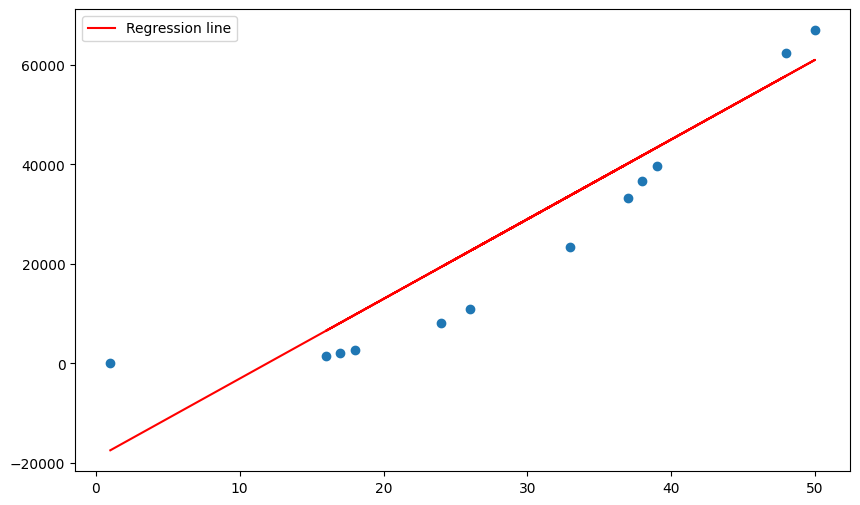

In [207]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = "red", label = "Regression line")
plt.legend()
plt.show()

<div style = "font-size:25px; font-weight:bold">

10. Summary
</div>

In [208]:
results

,Confirmed,Deaths,Infected,Recovered
R2 score,0.881992,0.848851,0.251254,0.850455
Mean Abs. Err.,9888.873968,467.927487,11531.900807,7962.400963
Mean Abs.Perc.Err,2.611712,5.259956,0.540050,53.238180


<div style = "font-size:25px; font-weight:bold">

According to the results we can see that the minimum percentage error belongs to "Confirmed" and also 88% of the variability can be explained according to R2 score. So, the best model is between Days and Confirmed. 
</div>